In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "computer modern sans serif"
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.unicode']=True

# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [2]:
pe = pd.read_csv('onda_plana_pseudo_analitica_resultados_pe.csv')
rk = pd.read_csv('onda_plana_pseudo_analitica_resultados_rk.csv')
cn = pd.read_csv('onda_plana_pseudo_analitica_resultados_cn.csv')

In [9]:
pec = pe.copy()
rkc = rk.copy()
cnc = cn.copy()

scaler = StandardScaler()
cols = ['stdvar', 'skew', 'a', 'stdvar_real', 'skew_real', 'a_real']

pec[cols] = scaler.fit_transform(pec[cols])
rkc[cols] = scaler.fit_transform(rkc[cols])
cnc[cols] = scaler.fit_transform(cnc[cols])

0.006802721088435374
0.006802721088435374
0.32


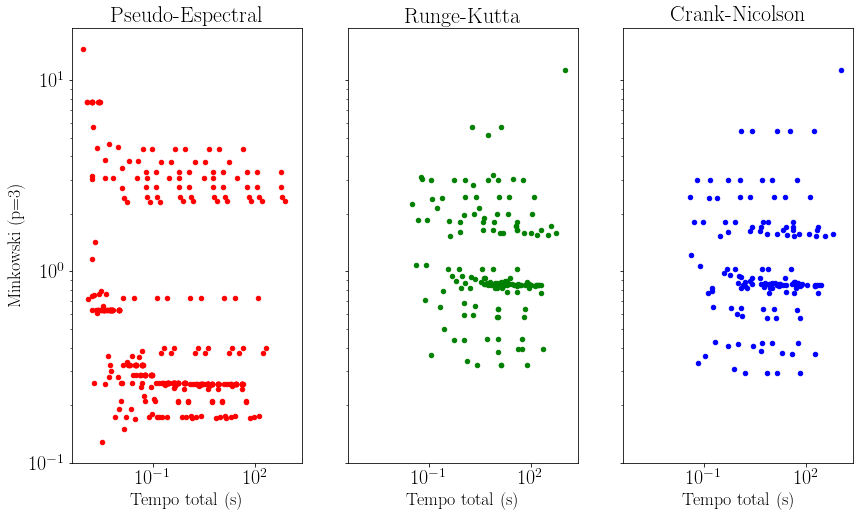

In [40]:
p = 3
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True);

with pd.plotting.plot_params.use('x_compat', True):
    pec['minkowski'] = pec.apply(lambda l: cdist(XA=[[l.a,l['stdvar'],l['skew']]], XB=[[l.a_real,l.stdvar_real,l.skew_real]], metric='minkowski', p=p)[0][0], axis=1)
    pec.plot(x='program_time', y='minkowski', kind='scatter', loglog=True, color='r', ax=ax1, sharex=True, sharey=True)

    rkc['minkowski'] = rkc.apply(lambda l: cdist(XA=[[l.a,l['stdvar'],l['skew']]], XB=[[l.a_real,l.stdvar_real,l.skew_real]], metric='minkowski', p=p)[0][0], axis=1)
    rkc.plot(x='program_time', y='minkowski', kind='scatter', loglog=True, color='g', ax=ax2, sharex=True, sharey=True)

    cnc['minkowski'] = cnc.apply(lambda l: cdist(XA=[[l.a,l['stdvar'],l['skew']]], XB=[[l.a_real,l.stdvar_real,l.skew_real]], metric='minkowski', p=p)[0][0], axis=1)
    cnc.plot(x='program_time', y='minkowski', kind='scatter', loglog=True, color='b', ax=ax3, sharex=True, sharey=True)

ax1.title.set_text('Pseudo-Espectral')
ax2.title.set_text('Runge-Kutta')
ax3.title.set_text('Crank-Nicolson')
ax1.set_ylabel('Minkowski (p=3)')
ax2.set_ylabel('Minkowski (p=3)')
ax3.set_ylabel('Minkowski (p=3)')
ax1.set_xlabel('Tempo total (s)')
ax2.set_xlabel('Tempo total (s)')
ax3.set_xlabel('Tempo total (s)')

print(cnc.loc[(cnc['program_time'] < 0.1) & (cnc['minkowski'] < 1)].shape[0]/cnc.shape[0])
print(rkc.loc[(rkc['program_time'] < 0.1) & (rkc['minkowski'] < 1)].shape[0]/rkc.shape[0])
print(pec.loc[(pec['program_time'] < 0.1) & (pec['minkowski'] < 1)].shape[0]/pec.shape[0])


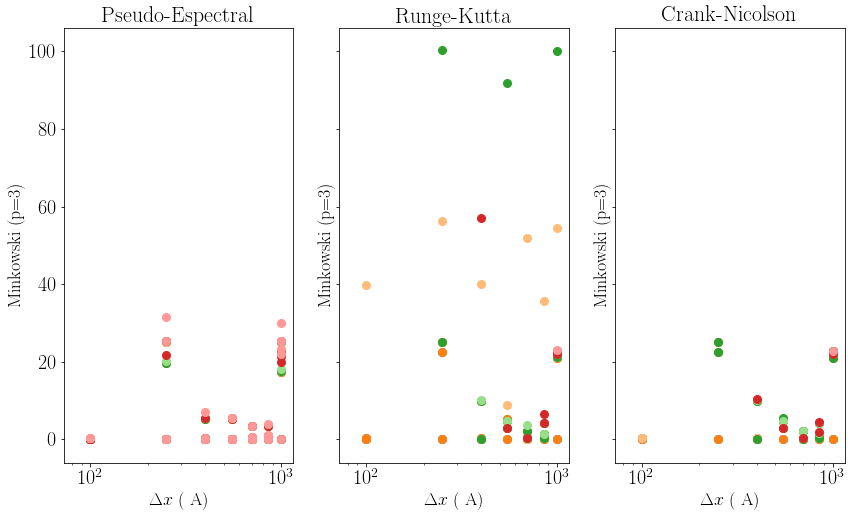

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True);

dts = [1e-19, 5e-19, 1e-18, 5e-18, 1e-17, 5e-17, 1e-16, 5e-16]

with pd.plotting.plot_params.use('x_compat', True):
    for i, dt in enumerate(dts):
        pecc = pec.loc[pec['dt'] == dt]
        ax1.scatter(pecc['size'], pecc.minkowski, color=tableau20[i])
        
        rkcc = rkc.loc[rkc['dt'] == dt]
        ax2.scatter(rkcc['size'], rkcc.minkowski, color=tableau20[i])
        
        cncc = cnc.loc[cnc['dt'] == dt]
        ax3.scatter(cncc['size'], cncc.minkowski, color=tableau20[i])
        

ax1.title.set_text('Pseudo-Espectral')
ax2.title.set_text('Runge-Kutta')
ax3.title.set_text('Crank-Nicolson')
ax1.set_ylabel('Minkowski (p=3)')
ax2.set_ylabel('Minkowski (p=3)')
ax3.set_ylabel('Minkowski (p=3)')
ax1.set_xlabel('$\Delta x$ (\r{A})')
ax2.set_xlabel('$\Delta x$ (\r{A})')
ax3.set_xlabel('$\Delta x$ (\r{A})')
#ax1.set_yscale('log')
ax1.set_xscale('log')
#ax2.set_yscale('log')
ax2.set_xscale('log')
#ax3.set_yscale('log')
ax3.set_xscale('log')

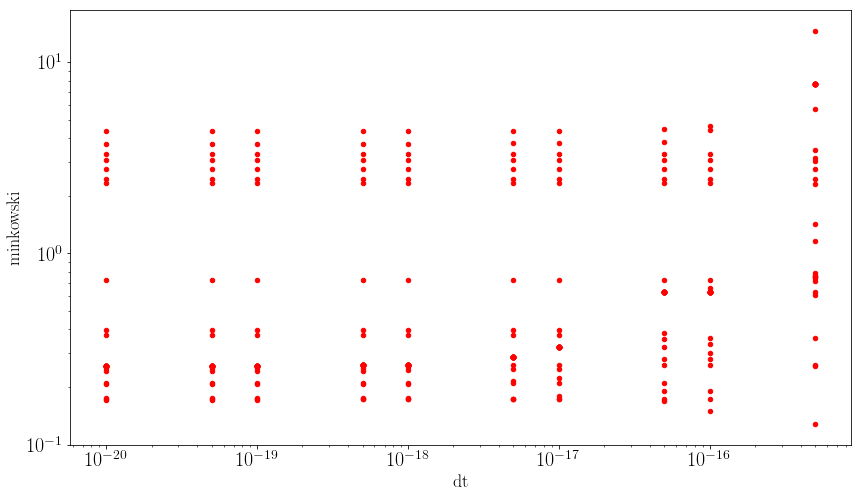

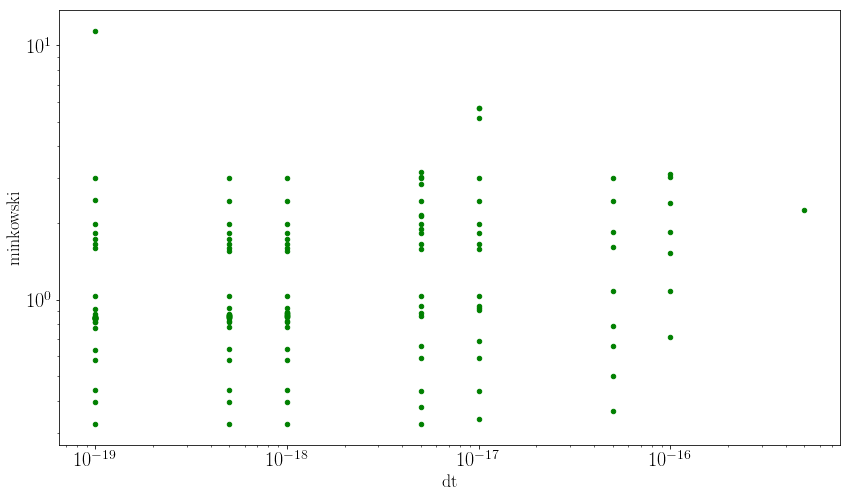

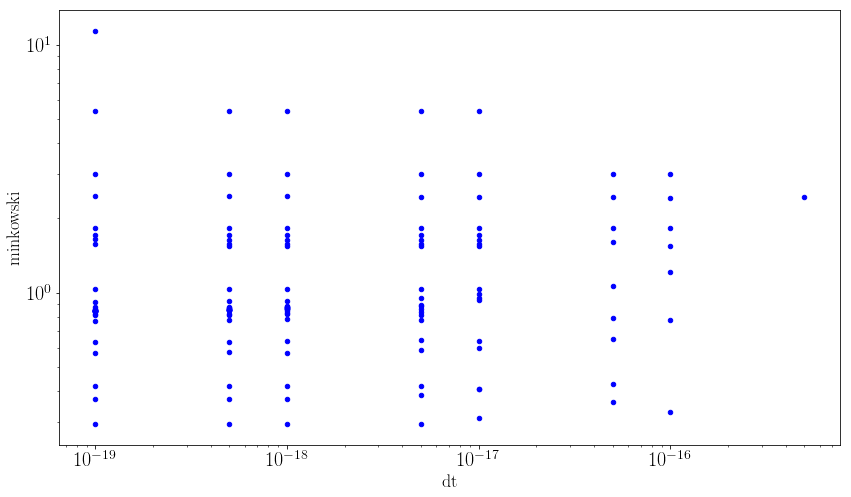

In [11]:
pec.plot(x='dt', y='minkowski', kind='scatter', loglog=True, color='r')
rkc.plot(x='dt', y='minkowski', kind='scatter', loglog=True, color='g')
cnc.plot(x='dt', y='minkowski', kind='scatter', loglog=True, color='b')

In [82]:
df = pec.copy()[['size', 'n', 'dt', 'minkowski']]
df.sort_values(by=['size', 'n', 'dt'], inplace=True)
#df['dt'] = df.apply(lambda l: "%s" % (l['dt']), axis=1)
df['L_N'] = df.apply(lambda l: "%04d - %04d" % (l['size'], l['n']), axis=1)
df = df[['L_N', 'dt', 'minkowski']]
df = df.pivot(index='L_N', columns='dt', values='minkowski').sort_index()
df.head(100)

dt,1e-20,5e-20,1e-19,5e-19,1e-18,5e-18,1e-17,5e-17,1e-16,5e-16
L_N,,,,,,,,,,
0100 - 0256,0.258890,0.259094,0.259094,0.261137,0.261137,0.288804,0.324322,0.629168,0.629168,0.719512
0100 - 0512,0.258890,0.259094,0.259094,0.261137,0.261137,0.288804,0.324322,0.629166,0.629166,0.741615
0100 - 1024,0.258890,0.259094,0.259094,0.261137,0.261137,0.288804,0.324322,0.629165,0.629165,0.752685
0100 - 2048,0.258890,0.259094,0.259094,0.261137,0.261137,0.288804,0.324322,0.629164,0.629164,0.758229
0100 - 4096,0.258890,0.259094,0.259094,0.261137,0.261137,0.288804,0.324322,0.629164,0.629164,0.761002
0250 - 0256,3.306497,3.306501,3.306501,3.306501,3.306501,3.308607,3.312133,3.326405,3.326405,3.484830
0250 - 0512,3.726728,3.726897,3.727310,3.729789,3.729789,3.754943,3.754943,3.843119,4.394660,14.518345
0250 - 1024,0.258891,0.259095,0.259095,0.261137,0.261137,0.288805,0.324323,0.629178,0.629178,7.717412
0250 - 2048,0.258891,0.259095,0.259095,0.261137,0.261137,0.288805,0.324323,0.629178,0.629178,7.717412


In [84]:
df = rkc.copy()[['size', 'n', 'dt', 'minkowski']]
df.sort_values(by=['size', 'n', 'dt'], inplace=True)
#df['dt'] = df.apply(lambda l: "%s" % (l['dt']), axis=1)
df['L_N'] = df.apply(lambda l: "%04d - %04d" % (l['size'], l['n']), axis=1)
df = df[['L_N', 'dt', 'minkowski']]
df = df.pivot(index='L_N', columns='dt', values='minkowski').sort_index()
df.head(100)

dt,1e-19,5e-19,1e-18,5e-18,1e-17,5e-17,1e-16,5e-16
L_N,,,,,,,,
0100 - 0256,0.816538,0.816508,0.815997,2.137788,NaN,NaN,NaN,NaN
0100 - 0512,0.846153,0.866101,0.888900,NaN,NaN,NaN,NaN,NaN
0100 - 1024,0.840782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0100 - 2048,0.839836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0250 - 0256,1.990396,1.990105,1.989380,1.986472,1.979195,NaN,NaN,NaN
0250 - 0512,1.731079,1.730924,1.730948,3.178778,5.689112,NaN,NaN,NaN
0250 - 1024,0.852449,0.860818,0.880265,NaN,NaN,NaN,NaN,NaN
0250 - 2048,0.845163,0.868844,NaN,NaN,NaN,NaN,NaN,NaN
0250 - 4096,0.840963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
